# Normal Distribution

### Task: Create a notebook about the normal distribution. Define and explain the main concepts. Pitch the notebook at your classmates. Use visuals like plots to explain concepts.

In [2]:
# importing all of the libraries we will need at the top of the notebook

import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

## Definition and Parameters

The normal distribution, also known as the Gaussian distribution, is a continuous, symmetrical probability distribution that visually resembles, and is popularly known as, the bell curve. A quick plot in NumPy will display the typical shape:

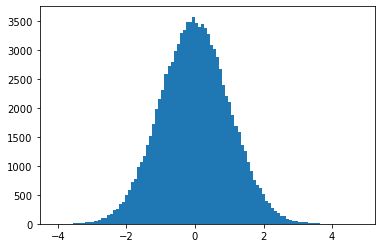

In [3]:
# a dataset of 100,000 points distributed normally. 'Loc' defines the middle point and peak of the curve,
# 'scale' how quickly that curve tapers off, and 'size' the number of data points used
nor = np.random.normal(loc=0, scale=1, size=100000)

# plot the dataset, segmenting all data points into 100 bins
plt.hist(nor, bins=100)
plt.show();

On a sufficiently large dataset, the exact characteristics of this curve are determined by two parameters: 

 - the <i>mean</i> of the range under investigation (signified by the Greek $\mu$, or <i>mu</i>, symbol). In NumPy this is known as the `loc` parameter;
 - the <i>standard variation</i> of the same dataset (signified by the Greek $\sigma$, or <i>sigma</i>, symbol). In NumPy, this is know nas the `scale` parameter.
 
The [Encyclopædia Britannica](https://www.britannica.com/topic/normal-distribution) (1998) elaborates on these concepts:

> the mean, or average, which is the maximum of the graph and about which the graph is always symmetric; and the standard deviation, which determines the amount of dispersion away from the mean.

In the below image from [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#Standard_deviation_and_coverage), we can see that 68.2% of the results fall within two standard deviations of the mean, and 99.7% falls within three standard deviations. This is true of all normally-distributed data, and is known as the Empirical Rule (Chen, 2022). Beyond this point, values do not become impossible, but they do become very unlikely to occur.

![image](std-dev.png)


## Building a normal distribution plot in NumPy

Now we know a bit more about these parameters, below is a more detailed visual representation of this, where we can see how each curve peaks at the $\mu$ value, and gets flatter given a larger $\sigma$ value. The plot contains four different lines representing normally-distributed data, with differing values for the mean ($\mu$) and the standard variation ($\sigma$).

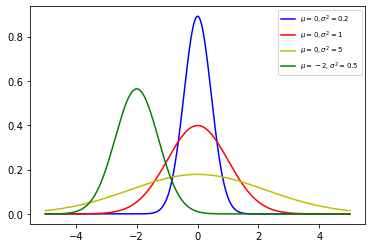

In [4]:
# I've adapted Ian's original plot code here and supplemented it with some ideas from the metadata supplied with the
# image and code found at this link: https://commons.wikimedia.org/wiki/File:Normal_Distribution_PDF.svg#Summary
# There are probably better ways to structure this code, but it is important that I find my own solution to things
# rather than simply copying-and-pasting things wholesale.

# values for the plot's x-axis
x = np.linspace(-5.0, 5.0, 1000)

# A list containing each mean, standard deviation and plot colour I wish to use,
# the NumPy sqrt() function is referred to in the bugs section of the README
mu_sig = [[0,0.2,'b'],[0,1,'r'],[0,5,'y'],[-2,0.5,'g']]

# Plot the function each of the items in mu_sig
for i in mu_sig:
    # assigns each item in the above list to a variable for use in the density function
    mu = i[0]
    # sig saves the value as-is, while sigma takes the square root
    sig = i[1]
    sigma = np.sqrt(sig)
    colour = i[2]
    # plots points on the y-axis using the density function. The divide by 1
    # in the formula below is referred to in the bugs section of the README
    plt.plot(
        x,
        # this density calculation is taken directly from the Wikipedia entry
        1/(sigma * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sigma**2)), 
        color=colour, 
        label=f'$\mu = {mu},\sigma^2 = {sig}$')

# Add a legend.
plt.legend(loc='best', fontsize='x-small')
plt.show();

We can see the effect that changing either or both of the $\mu$ and $\sigma$ values has on the shape of the plot. So the normal distribution assigns values equally either side of the mean, so the curve itself always remains symmetrical, and consistently peaks at the mean. This ensures that the "mean, median, and mode are all equal. Half of the population is less than the mean and half is greater than the mean." ([Frost](https://statisticsbyjim.com/basics/normal-distribution/), 2018).

While the symmetry of the normal distribution is one of it's most striking features, [Frost](https://statisticsbyjim.com/basics/normal-distribution/) (ibid) notes that:

> "not all symmetrical distributions are normal. For example, the Student’s t, Cauchy, and logistic distributions are symmetric."
    
Below we see summary plots from each of the Wikipedia articles for these distributions. In all four, the symmetry is present, but with subtle changes that ensure slight differences with the normal distribution. These are due to differing density functions, and the exact parameters that these density functions require.
    
![image](cls-dist.png)

Indeed, we can create plots using all of these distribution methods just as easily as we created the normal distribution data, using just a couple of parameters, and observe how similar they are without closer inspection.

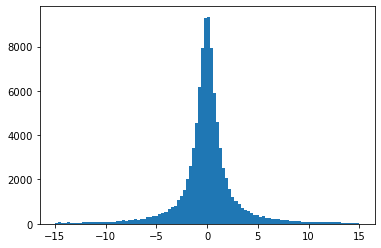

In [7]:
# a dataset distributed using Cauchy distribution, with no addition parameters required beyond size
cau = np.random.standard_cauchy(size=100000)

# step taken from the NumPy documentation on Cauchy, link in README. This limits the range to one where the curve
# is at least visible
cau = cau[(cau>-15) & (cau<15)]

# plot the dataset, segmenting all data points into 100 bins
plt.hist(cau, bins=100)
plt.show();

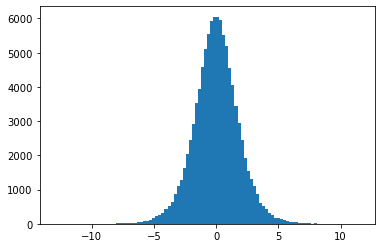

In [5]:
# a dataset distributed logistically. Like the normal distribution, it takes the mean and standard deviation as
# parameters, but the density function produces a slightly different shape
log = np.random.logistic(loc=0, scale=1, size=100000)

# plot the dataset, segmenting all data points into 100 bins
plt.hist(log, bins=100)
plt.show();

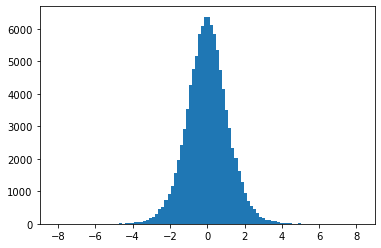

In [6]:
# parameter guide found in the GeeksForGeeks article in the README

# a dataset distributed using Student's t-distribution. Requires two parameters: degrees of freedom and range
stt = np.random.standard_t(df=10, size=100000)

# plot the dataset, segmenting all data points into 100 bins
plt.hist(stt, bins=100)
plt.show();

## The normal density function

NumPy gives us the handy `normal` function that we've already seen, where we provide the parameters and get a nice plot back. But there is work going underneath that is important to understand too. All distributions are created by a corresponding probability density function, with the normal function expressed as:

$$f(x) = \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

Here we can see the $\mu$ and $\sigma$ symbols identified above as the mean and the standard deviation of the dataset respectively. Also of interest is the presence of $e$ and $\pi$, two mathematical constants with many uses. The full values of these items to fifty places are:

$e$ = 2.71828182845904523536028747135266249775724709369995 ([NumPy](https://numpy.org/doc/stable/reference/constants.html#numpy.e), 2022) \
$\pi$ = 3.14159265358979323846264338327950288419716939937510 ([Andersson](http://www.eveandersson.com/pi/digits/), 2022) 

Luckily, NumPy once again has a number of [constant functions](https://numpy.org/doc/stable/reference/constants.html) that we can use to quickly reference these with a high-level of accuracy, and we can also use the `exp` function to produce the exponent of a given value using $e$:

In [7]:
print(np.exp(1))
print(np.pi)

2.718281828459045
3.141592653589793


With the value of $x$ being simply a given point on the x-axis, we have everything we need to calculate and plot a normal distribution. We can use NumPy's `sqrt` functions, as well as the `pi` and `exp` to help us construct the density function.

In [8]:
mu = 0.0
sigma = 4.0
x = 1.0

# this density calculation is taken from Ian's notebook
(1.0 / np.sqrt(2 * np.pi * sigma**2)) * (np.exp(-((x - mu)**2 / (2 * sigma**2))))

0.09666702920071231

This looks rather meaningless with just a single value, so we can plot multiple values to create an x-axis. We will use the `linspace` function to create an evenly-spaced number of intervals between two points.

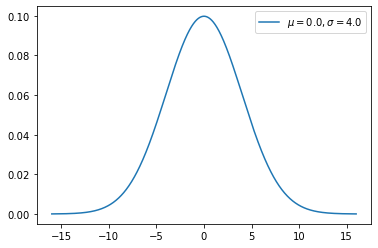

In [9]:
# plot a basic norm dist adapting Ian's code

# x-axis values for the plot
x = np.linspace(start=-16.0, stop=16.0, num=1000)

plt.plot(
    x,
    # this density calculation is taken from Ian's notebook
    (1.0 / np.sqrt(2 * np.pi * sigma**2)) * (np.exp(-((x - mu)**2 / (2 * sigma**2)))),
    # this density calculation is taken from Wikipedia
    # (1/(sigma * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sigma**2))),
    label=f'$\mu = {mu}, \sigma = {sigma}$')

# Add a legend.
plt.legend();

## The Central Limit Theorem

Wolfram: "Normal distributions have many convenient properties, so random variates with unknown distributions are often assumed to be normal, especially in physics and astronomy. Although this can be a dangerous assumption, it is often a good approximation due to a surprising result known as the central limit theorem. This theorem states that the mean of any set of variates with any distribution having a finite mean and variance tends to the normal distribution. Many common attributes such as test scores, height, etc., follow roughly normal distributions, with few members at the high and low ends and many in the middle.

Because they occur so frequently, there is an unfortunate tendency to invoke normal distributions in situations where they may not be applicable."

Techtarget - "normal distribution is the key idea behind the central limit theorem, or CLT, which states that averages calculated from independent, identically distributed random variables have approximately normal distributions. This is true regardless of the type of distribution from which the variables are sampled, as long as it has finite variance." - if you actually use this quote, it's from https://www.techtarget.com/whatis/definition/normal-distribution, which I've not added to the references yet because I've not used it anywhere else

should this section go after the use cases?

https://www.youtube.com/watch?v=YAlJCEDH2uY

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm - there are some good comments at the end of this article around why it is popular, and about how the central limit theorem proves it. This was mentioned in the EncycBrit article.

## Probability and Z-Scores

Process of standardising the normal distribution: 

Wolfram: "The so-called "standard normal distribution" is given by taking $\mu=0$ and $\sigma^2=1$ in a general normal distribution. An arbitrary normal distribution can be converted to a standard normal distribution by changing variables to $z = \frac{x - \mu}{\sigma}$"

$$z = \frac{x - \mu}{\sigma}$$

https://www.youtube.com/watch?v=xI9ZHGOSaCg

In [10]:
# step through the process outlined from 2:00 in the video above, display using of LaTeX above

Luckily for us, SciPy contains a built in functions that allow us to work this out pretty quickly.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html - find also a good link for the cdf/pdf functions

Both examples below directly taken from Ian's notebook

In [11]:
# The 50th percentile - the mean in this case
ss.norm().ppf(0.50)

0.0

In [12]:
# The percentile of 0.0 on the x axis.
ss.norm().cdf(0.0)

0.5

## Use Cases

"Its familiar bell-shaped curve is ubiquitous in statistical reports, from survey analysis and quality control to resource allocation." - ([Encyclopædia Britannica](https://www.britannica.com/topic/normal-distribution), 1998)

Mention something about ubiquity of normal distribution, and funnily enough, this advert came up while I was researching at https://statisticsbyjim.com/basics/normal-distribution/:

![image](norm-dist-ad.png)

Male heights: plot these https://www.youtube.com/watch?v=rzFX5NWojp0
baby stddev 0.6, mean 20 inches, adult stddev 4, mean 70 inches, this means that 95% of male heights fall within 8 inches of the average

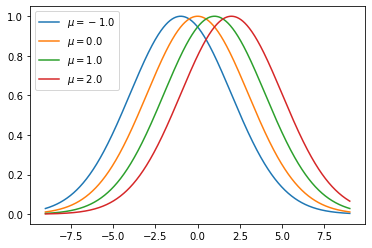

In [13]:
# plot a basic norm dist here, below is Ian's example

# Changing values of mu.
# The mu again represents the mean, this is why in numpy the particular parameter is called the loc, for location

# Set some initial values, we'll ignore this mu.
mu, sigma = 0.0, 3.0

# x values for plot.
x = np.linspace(-9.0, 9.0, 1000)

# Plot the function for several different values of mu.
for mu in [-1.0, 0.0, 1.0, 2.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$')

# Add a legend.
plt.legend();

### Misc notes

Stats by Jim also contains a section called “Population Parameters Versus Sample Estimates”, which is an explanation of the fact that you can’t always know the exact mean or standard deviation, meaning you have to estimate these. From this you can go into a section on Bessel’s correction?

![image](..\materials\normal-pdf-cdf.png)
<sub>The plot on the left shows the familiar bell curves using a <i>probability density function</i>, while the plot on the right shows the same data using a <i>cumulative distribution function</i>.</sub>